# Vamos ahora con un ensamble de arboles de decisión

## Importamos librerias y funciones necesarias

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [2]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion

# Ahora obtengo el set de entrenamiento y realizo el primer preproccesing

In [3]:
df, df_holdout = obtener_datasets()

X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 

Aplicando 'conversion_numerica' en las variables categóricas.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=10,stratify=y_df)

# Primer Preprocesameinto simple: conversion_numerica()

Naturalemnte, utilizo gridsearch para la busqueda optima de hiperparámetros

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


Best score in train: 0.9065823365020392
Count estimators 100
AUC-ROC score sobre test:  0.9042280132477661
AUC-ROC score sobre train:  0.9087918785040457
Accuracy sobre test:  0.8466144633809305
Los mejores hiperpametros elegidos:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 100}
              precision    recall  f1-score   support

  Bajo valor       0.95      0.86      0.90      5494
  Alto valor       0.51      0.78      0.61      1019

    accuracy                           0.85      6513
   macro avg       0.73      0.82      0.76      6513
weighted avg       0.88      0.85      0.86      6513



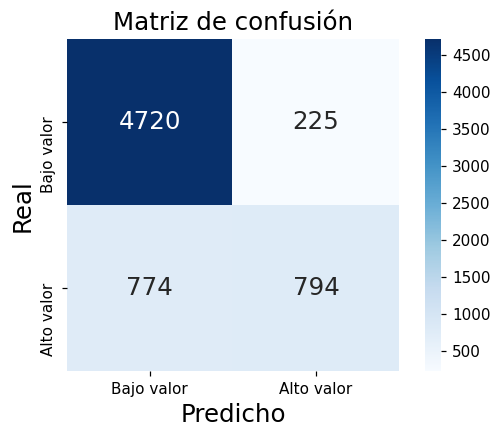

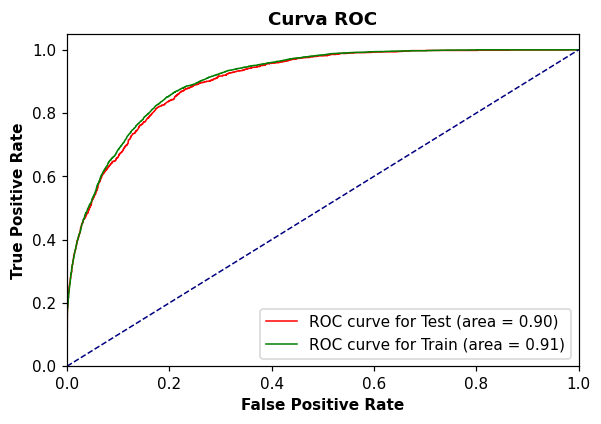

In [5]:
params = {
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': np.arange(50, 100, 20),
    'n_estimators': np.arange(100,200,50),
    'criterion': ["gini", "entropy"],
}

clf = RandomForestClassifier(max_features="sqrt", random_state= 10)
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, params, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Best score in train: {clf.best_score_}")
print(f"Count estimators {len(clf.best_estimator_.estimators_)}")
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)


## Por chusmear veo la importancia de features

In [6]:
sorted(list(zip(X_train.columns, clf.best_estimator_.feature_importances_)), key=lambda x: -x[1])

[('estado_marital_matrimonio_civil', 0.25157653788161055),
 ('suma_declarada_bolsa_argentina', 0.19673053930691922),
 ('anios_estudiados', 0.12272604315803647),
 ('educacion_alcanzada', 0.08578352889150961),
 ('estado_marital_sin_matrimonio', 0.06890244170150309),
 ('edad', 0.06730162272621419),
 ('horas_trabajo_registradas', 0.04191294425044905),
 ('genero_mujer', 0.030794419126328725),
 ('trabajo_directivo_gerente', 0.02996433783800399),
 ('rol_familiar_registrado_sin_familia', 0.02633306889242443),
 ('rol_familiar_registrado_con_hijos', 0.0227540344921777),
 ('trabajo_profesional_especializado', 0.02091918508529266),
 ('rol_familiar_registrado_soltero_a', 0.00724911095825276),
 ('trabajo_otros', 0.006788697797161547),
 ('categoria_de_trabajo_responsable_inscripto', 0.004287633042869826),
 ('trabajo_limpiador', 0.0019596423813570112),
 ('categoria_de_trabajo_monotibutista', 0.0019476299555639335),
 ('trabajo_inspector', 0.0018404584584186265),
 ('rol_familiar_registrado_otro', 0.0013

# Segundo Preprocesamiento: reduccion_rfecv()

In [7]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion
from preprocessing import get_dataframe_polynomial
from preprocessing import reduccion_rfecv
from preprocessing import aplicar_preparacion_generalizado
from preprocessing import conversion_numerica_generalizada

In [8]:
from sklearn import preprocessing, tree

df, df_for_prediction = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df_numerico = conversion_numerica(X_df) 


clf = tree.DecisionTreeClassifier(random_state=10, criterion = 'gini', max_depth = 7, min_samples_leaf =50)

X_reducido = reduccion_rfecv(
    estimator=clf,
    X_df = X_df_numerico,
    y_df = y_df,
    min_features_to_select=30,
    step=10,
    n_jobs=-1,
    scoring="roc_auc",
    cv=10
)


Aplicando 'conversion_numerica' en las variables categóricas.


In [9]:
X_reducido

,anios_estudiados,edad,educacion_alcanzada,suma_declarada_bolsa_argentina,horas_trabajo_registradas,genero_mujer,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,estado_marital_separado_a,...,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,religion_budismo,religion_cristianismo,religion_judaismo,religion_otro,rol_familiar_registrado_con_hijos,rol_familiar_registrado_otro,rol_familiar_registrado_sin_familia,rol_familiar_registrado_soltero_a
0,17,39,5,2174,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17,50,5,0,13,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,13,38,4,0,40,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,11,53,3,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,17,28,5,0,40,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,5,0,38,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32557,13,40,4,0,40,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32558,13,58,4,0,40,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,13,22,4,0,20,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_reducido, y_df, random_state=10, test_size=0.20, stratify=y_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


Best score in train: 0.9058309860544312
Count estimators 150
AUC-ROC score sobre test:  0.9026554213697613
AUC-ROC score sobre train:  0.9074081987640730
Accuracy sobre test:  0.8464609243052357
Los mejores hiperpametros elegidos:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 150}
              precision    recall  f1-score   support

  Bajo valor       0.95      0.86      0.90      5469
  Alto valor       0.51      0.77      0.62      1044

    accuracy                           0.85      6513
   macro avg       0.73      0.82      0.76      6513
weighted avg       0.88      0.85      0.86      6513



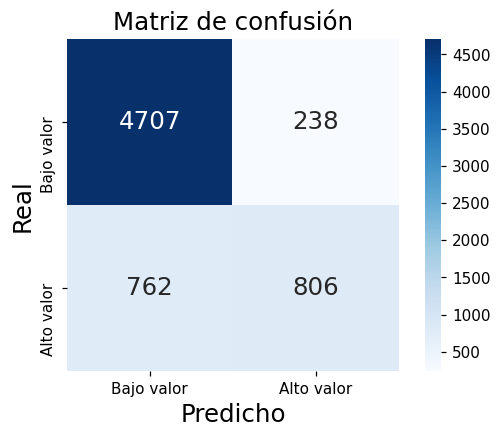

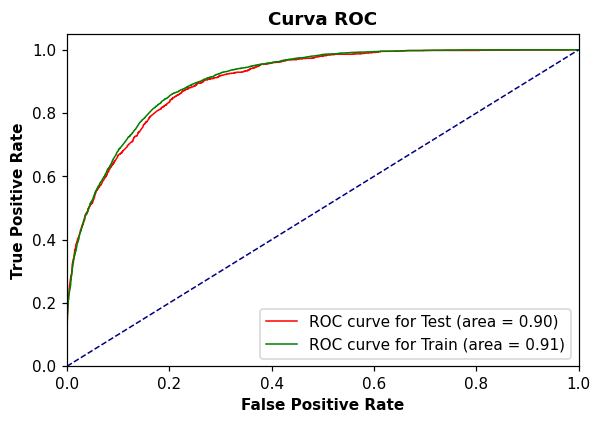

In [11]:
params = {
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': np.arange(50, 100, 20),
    'n_estimators': np.arange(100,200,50),
    'criterion': ["gini", "entropy"],
}

clf = RandomForestClassifier(max_features="sqrt", random_state= 10)
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, params, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Best score in train: {clf.best_score_}")
print(f"Count estimators {len(clf.best_estimator_.estimators_)}")
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)

# Tercer Preprocesamiento: conversion_numerica_generalizada()

In [12]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion
from preprocessing import get_dataframe_polynomial
from preprocessing import reduccion_rfecv
from preprocessing import aplicar_preparacion_generalizado
from preprocessing import conversion_numerica_generalizada

In [13]:
df, df_for_prediction = obtener_datasets()
X_df_2, y_df = aplicar_preparacion_generalizado(df)
X_df_numerico_2 = conversion_numerica_generalizada(X_df_2) 

Aplicando 'conversion_numerica_generalizada' en las variables categóricas.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_df_numerico_2, y_df, test_size=0.20, random_state=10,stratify=y_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


Best score in train: 0.9069324233681838
Count estimators 150
AUC-ROC score sobre test:  0.9056724092569283
AUC-ROC score sobre train:  0.9095066791375879
Accuracy sobre test:  0.8473821587594043
Los mejores hiperpametros elegidos:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 150}
              precision    recall  f1-score   support

  Bajo valor       0.96      0.86      0.90      5499
  Alto valor       0.51      0.78      0.62      1014

    accuracy                           0.85      6513
   macro avg       0.73      0.82      0.76      6513
weighted avg       0.89      0.85      0.86      6513



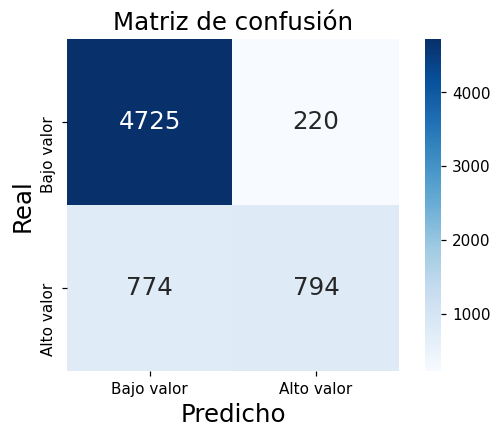

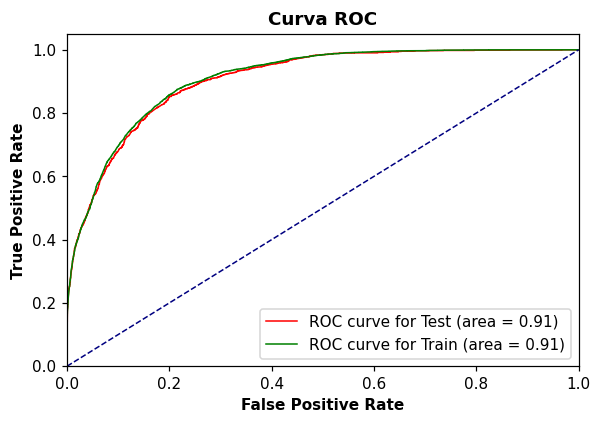

In [15]:
params = {
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': np.arange(50, 100, 20),
    'n_estimators': np.arange(100,200,50),
    'criterion': ["gini", "entropy"],
}

clf = RandomForestClassifier(max_features="sqrt", random_state= 10)
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, params, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Best score in train: {clf.best_score_}")
print(f"Count estimators {len(clf.best_estimator_.estimators_)}")
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)


# Cuarto Preprocesamiento: get_dataframe_polynomial()

In [16]:
df, df_for_prediction = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df_numerico = conversion_numerica(X_df) 

X_reduced_poly = get_dataframe_polynomial(X_df_numerico, 2, True)
X_reduced_poly.shape

Aplicando 'conversion_numerica' en las variables categóricas.
Dataset inicial con 40 features...
Dataset nuevo con PolynomialFeature con 46 features...


(32561, 46)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_poly, y_df, test_size=0.20, random_state=10,stratify=y_df)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


Best score in train: 0.9091595859257398
Count estimators 150
AUC-ROC score sobre test:  0.9068484193475166
AUC-ROC score sobre train:  0.9124230286401920
Accuracy sobre test:  0.8542914171656687
Los mejores hiperpametros elegidos:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 150}
              precision    recall  f1-score   support

  Bajo valor       0.96      0.86      0.91      5482
  Alto valor       0.53      0.80      0.63      1031

    accuracy                           0.85      6513
   macro avg       0.74      0.83      0.77      6513
weighted avg       0.89      0.85      0.87      6513



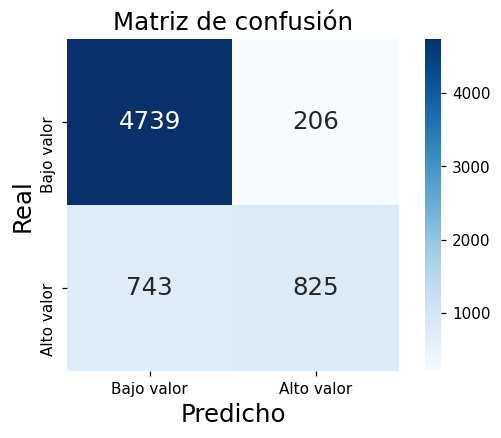

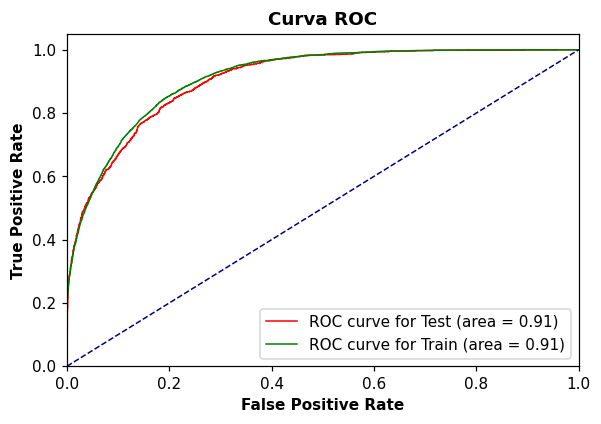

In [18]:
params = {
    'max_depth': np.arange(3, 8),
    'min_samples_leaf': np.arange(50, 100, 20),
    'n_estimators': np.arange(100,200,50),
    'criterion': ["gini", "entropy"],
}

clf = RandomForestClassifier(max_features="sqrt", random_state= 10)
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, params, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Best score in train: {clf.best_score_}")
print(f"Count estimators {len(clf.best_estimator_.estimators_)}")
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)
